[출처](https://www.youtube.com/watch?v=lG8pEwvYwCw&list=PL7ZVZgsnLwEEZcVusN-fV_sJhQHq833OS&index=2)

In [12]:
import pandas as pd
import numpy as np

## 데이터 읽기 및 저장


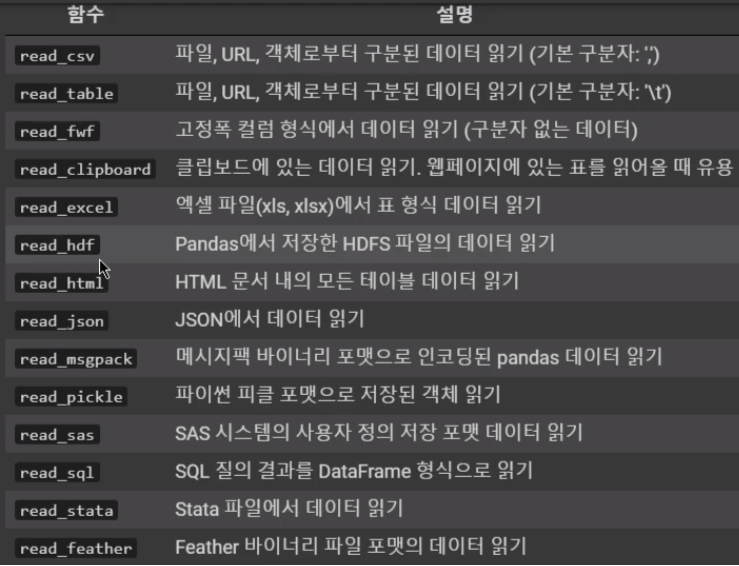

### 텍스트 파일 읽기/쓰기

In [13]:
%%writefile example.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example.csv


In [14]:
# COLAB
# !ls 

# Local
import os
os.listdir()

['.ipynb_checkpoints',
 'A00_Basic_Pandas.ipynb',
 'data',
 'example.csv',
 'L00_Pandas.ipynb',
 'L01_Pandas_Basics.ipynb',
 'L02_데이터 집계와 그룹 연산.ipynb',
 'L03_문자열 연산.ipynb',
 'L04_시계열 처리.ipynb',
 'L05_데이터 읽기 및 저장.ipynb',
 'L06_데이터 정제.ipynb',
 'Pandas_Practice']

In [15]:
pd.read_csv('example.csv')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [16]:
%%writefile example2.csv
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example2.csv


In [17]:
pd.read_csv('example2.csv', header=None)

,0,1,2,3,4,5
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [18]:
pd.read_csv('example2.csv', names=['a', 'b', 'c', 'd', 'e', 'text'])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [19]:
pd.read_csv('example2.csv', names=['a', 'b', 'c', 'd', 'e', 'text'], index_col='text')

,a,b,c,d,e
text,,,,,
hi,1,2,3,4,5
pandas,6,7,8,9,10
csv,11,12,13,14,15


In [20]:
%%writefile example3.txt
     a    b     c
1   0.1   0.2   0.3
2   0.4   0.5   0.6
3   0.7   0.8   0.9

Writing example3.txt


In [24]:
pd.read_table('example3.txt', sep='\s')  # 모든 공간으로 나누기

C:\Users\bigne\anaconda3\lib\site-packages\pandas\io\parsers.py:765: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support regex separators (separators > 1 char and different from '\s+' are interpreted as regex); you can avoid this warning by specifying engine='python'.
  return read_csv(**locals())


,a,Unnamed: 1,Unnamed: 2,Unnamed: 3,b,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,c
0,1,NaN,NaN,0.1,NaN,NaN,0.2,NaN,NaN,0.3
1,2,NaN,NaN,0.4,NaN,NaN,0.5,NaN,NaN,0.6
2,3,NaN,NaN,0.7,NaN,NaN,0.8,NaN,NaN,0.9


In [25]:
pd.read_table('example3.txt', sep='\s+')  # 하나의 공간으로 나누기

,a,b,c
1,0.1,0.2,0.3
2,0.4,0.5,0.6
3,0.7,0.8,0.9


In [26]:
%%writefile example4.csv
# 파일 설명
a, b, c, d, e, text
# 컬럼은 a, b, c, d ,e 와 text가 있음
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Writing example4.csv


In [27]:
pd.read_csv('example4.csv')

,,,,,# 파일 설명
a,b,c,d,e,text
# 컬럼은 a,b,c,d,e 와 text가 있음,NaN
1,2,3,4,5,hi
6,7,8,9,10,pandas
11,12,13,14,15,csv


In [28]:
pd.read_csv('example4.csv', skiprows=[0, 2])

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [29]:
%%writefile example5.csv
a, b, c, d, e, text
1, 2, NA, 4, 5, hi
6, 7, 8, NULL, 10, pandas
11, NA, 13, 14, 15, csv

Writing example5.csv


In [30]:
pd.read_csv('example5.csv')

,a,b,c,d,e,text
0,1,2,NA,4,5,hi
1,6,7,8,NULL,10,pandas
2,11,NA,13,14,15,csv


In [42]:
%%writefile example6.csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv
a, b, c, d, e, text
1, 2, 3, 4, 5, hi
6, 7, 8, 9, 10, pandas
11, 12, 13, 14, 15, csv

Overwriting example6.csv


In [43]:
pd.read_csv('example6.csv', nrows=5)

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv
3,a,b,c,d,e,text
4,1,2,3,4,5,hi


In [44]:
df = pd.read_csv('example6.csv')
df

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv
3,a,b,c,d,e,text
4,1,2,3,4,5,hi
5,6,7,8,9,10,pandas
6,11,12,13,14,15,csv
7,a,b,c,d,e,text
8,1,2,3,4,5,hi
9,6,7,8,9,10,pandas


In [45]:
df.to_csv('output.scv')

In [46]:
# CoLab
# !cat output.scv

# Jupyter Notebook
output = open('output.scv', 'r')
output2 = output.read()
print(output2)
output.close()

,a, b, c, d, e, text
0,1, 2, 3, 4, 5, hi
1,6, 7, 8, 9, 10, pandas
2,11, 12, 13, 14, 15, csv
3,a, b, c, d, e, text
4,1, 2, 3, 4, 5, hi
5,6, 7, 8, 9, 10, pandas
6,11, 12, 13, 14, 15, csv
7,a, b, c, d, e, text
8,1, 2, 3, 4, 5, hi
9,6, 7, 8, 9, 10, pandas
10,11, 12, 13, 14, 15, csv
11,a, b, c, d, e, text
12,1, 2, 3, 4, 5, hi
13,6, 7, 8, 9, 10, pandas
14,11, 12, 13, 14, 15, csv
15,a, b, c, d, e, text
16,1, 2, 3, 4, 5, hi
17,6, 7, 8, 9, 10, pandas
18,11, 12, 13, 14, 15, csv



In [47]:
dr = pd.date_range('2020-01-01', periods=10)
ts = pd.Series(np.arange(10), index=dr)
ts

2020-01-01    0
2020-01-02    1
2020-01-03    2
2020-01-04    3
2020-01-05    4
2020-01-06    5
2020-01-07    6
2020-01-08    7
2020-01-09    8
2020-01-10    9
Freq: D, dtype: int32

In [51]:
ts.to_csv('ts.csv', header=['value'])

In [54]:
# CoLab
# !cat ts.scv

# Jupyter Notebook
output = open('ts.csv', 'r')
output2 = output.read()
print(output2)
output.close()

,value
2020-01-01,0
2020-01-02,1
2020-01-03,2
2020-01-04,3
2020-01-05,4
2020-01-06,5
2020-01-07,6
2020-01-08,7
2020-01-09,8
2020-01-10,9



In [55]:
%%writefile example.json
[{"a":1, "b":2, "c":3, "d":4, "e":5},
 {"a":11, "b":12, "c":13, "d":14, "e":15},
 {"a":21, "b":22, "c":23, "d":24, "e":25}]

Writing example.json


In [56]:
# CoLab
# !cat example.json

# Jupyter Notebook
output = open('example.json', 'r')
output2 = output.read()
print(output2)
output.close()

[{"a":1, "b":2, "c":3, "d":4, "e":5},
 {"a":11, "b":12, "c":13, "d":14, "e":15},
 {"a":21, "b":22, "c":23, "d":24, "e":25}]



In [57]:
pd.read_json('example.json')

,a,b,c,d,e
0,1,2,3,4,5
1,11,12,13,14,15
2,21,22,23,24,25


In [58]:
ts.to_json("output.json")

In [59]:
# CoLab
# !cat output.json

# Jupyter Notebook
output = open('output.json', 'r')
output2 = output.read()
print(output2)
output.close()

{"1577836800000":0,"1577923200000":1,"1578009600000":2,"1578096000000":3,"1578182400000":4,"1578268800000":5,"1578355200000":6,"1578441600000":7,"1578528000000":8,"1578614400000":9}


In [61]:
df.to_json("output2.json")

In [62]:
# CoLab
# !cat output2.json

# Jupyter Notebook
output = open('output2.json', 'r')
output2 = output.read()
print(output2)
output.close()

{"a":{"0":"1","1":"6","2":"11","3":"a","4":"1","5":"6","6":"11","7":"a","8":"1","9":"6","10":"11","11":"a","12":"1","13":"6","14":"11","15":"a","16":"1","17":"6","18":"11"}," b":{"0":" 2","1":" 7","2":" 12","3":" b","4":" 2","5":" 7","6":" 12","7":" b","8":" 2","9":" 7","10":" 12","11":" b","12":" 2","13":" 7","14":" 12","15":" b","16":" 2","17":" 7","18":" 12"}," c":{"0":" 3","1":" 8","2":" 13","3":" c","4":" 3","5":" 8","6":" 13","7":" c","8":" 3","9":" 8","10":" 13","11":" c","12":" 3","13":" 8","14":" 13","15":" c","16":" 3","17":" 8","18":" 13"}," d":{"0":" 4","1":" 9","2":" 14","3":" d","4":" 4","5":" 9","6":" 14","7":" d","8":" 4","9":" 9","10":" 14","11":" d","12":" 4","13":" 9","14":" 14","15":" d","16":" 4","17":" 9","18":" 14"}," e":{"0":" 5","1":" 10","2":" 15","3":" e","4":" 5","5":" 10","6":" 15","7":" e","8":" 5","9":" 10","10":" 15","11":" e","12":" 5","13":" 10","14":" 15","15":" e","16":" 5","17":" 10","18":" 15"}," text":{"0":" hi","1":" pandas","2":" csv","3":" text

### 이진 데이터 파일 읽기/쓰기

In [64]:
df = pd.read_csv('example.csv')

In [65]:
df.to_pickle('df_pickle')
pd.read_pickle('df_pickle')

,a,b,c,d,e,text
0,1,2,3,4,5,hi
1,6,7,8,9,10,pandas
2,11,12,13,14,15,csv


In [66]:
df = pd.DataFrame({'a': np.random.randn(100),
                   'b': np.random.randn(100),
                   'c': np.random.randn(100)})
df

,a,b,c
0,0.985106,-0.002253,0.701103
1,0.063174,0.775805,-0.630300
2,0.994358,0.831187,-0.790204
3,1.888963,0.541904,-0.316667
4,-0.046967,-0.222610,-0.180752
...,...,...,...
95,-1.047449,0.007957,-1.423800
96,-0.178055,-3.036164,0.119259
97,0.343460,-1.691813,-0.105787
98,-1.602273,-1.132641,-0.019263


In [68]:
h = pd.HDFStore('datae.h5')
h['obj1'] = df
h['obj1_col1'] = df['a']
h['obj1_col2'] = df['b']
h['obj1_col3'] = df['c']
h

<class 'pandas.io.pytables.HDFStore'>
File path: datae.h5

In [69]:
h['obj1']

,a,b,c
0,0.985106,-0.002253,0.701103
1,0.063174,0.775805,-0.630300
2,0.994358,0.831187,-0.790204
3,1.888963,0.541904,-0.316667
4,-0.046967,-0.222610,-0.180752
...,...,...,...
95,-1.047449,0.007957,-1.423800
96,-0.178055,-3.036164,0.119259
97,0.343460,-1.691813,-0.105787
98,-1.602273,-1.132641,-0.019263


In [70]:
h.put('obj2', df, format='table')

In [71]:
h.select('obj2', where=['index > 50 and index <=60'])

,a,b,c
51,-0.423082,0.083874,-0.079419
52,-0.661633,-0.394402,-0.806237
53,-0.764015,0.195674,0.144368
54,-0.781395,-0.480801,-3.029185
55,1.272195,-0.993941,-0.896348
56,0.744888,0.065207,0.692793
57,-0.205916,0.379198,-1.453720
58,-0.043838,0.872632,0.252666
59,-0.425574,-0.028152,-2.137476
60,-0.380686,-1.321817,-1.442377


In [72]:
h.close()

In [73]:
df.to_hdf('data.h5', 'obj3', format='table')

In [74]:
pd.read_hdf('data.h5', 'obj3', where=['index < 10'])

,a,b,c
0,0.985106,-0.002253,0.701103
1,0.063174,0.775805,-0.630300
2,0.994358,0.831187,-0.790204
3,1.888963,0.541904,-0.316667
4,-0.046967,-0.222610,-0.180752
5,-0.433587,0.182193,1.554515
6,-1.142789,0.533405,-1.893650
7,0.510855,1.097733,-0.866311
8,-0.456768,0.539520,-1.033781
9,-1.356109,-0.215529,0.271703


In [75]:
df.to_excel('example.xlsx', 'Sheet1')

In [76]:
# COLAB
# !ls 

# Local
import os
os.listdir()

['.ipynb_checkpoints',
 'A00_Basic_Pandas.ipynb',
 'data',
 'data.h5',
 'datae.h5',
 'df_pickle',
 'example.csv',
 'example.json',
 'example.xlsx',
 'example2.csv',
 'example3.txt',
 'example4.csv',
 'example5.csv',
 'example6.csv',
 'L00_Pandas.ipynb',
 'L01_Pandas_Basics.ipynb',
 'L02_데이터 집계와 그룹 연산.ipynb',
 'L03_문자열 연산.ipynb',
 'L04_시계열 처리.ipynb',
 'L05_데이터 읽기 및 저장.ipynb',
 'L06_데이터 정제.ipynb',
 'output.json',
 'output.scv',
 'output2.json',
 'Pandas_Practice',
 'ts.csv']

In [78]:
pd.read_excel('example.xlsx', sheet_name='Sheet1')

,Unnamed: 0,a,b,c
0,0,0.985106,-0.002253,0.701103
1,1,0.063174,0.775805,-0.630300
2,2,0.994358,0.831187,-0.790204
3,3,1.888963,0.541904,-0.316667
4,4,-0.046967,-0.222610,-0.180752
...,...,...,...,...
95,95,-1.047449,0.007957,-1.423800
96,96,-0.178055,-3.036164,0.119259
97,97,0.343460,-1.691813,-0.105787
98,98,-1.602273,-1.132641,-0.019263


## 참고문헌

* Pandas 사이트: https://pandas.pydata.org/
* Jake VanderPlas, "Python Data Science Handbook", O'Reilly
* Wes Mckinney, "Python for Data Analysis", O'Reilly